In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

In [2]:
try:
    df = pd.read_csv("Real estate.csv", index_col=0)
except:
    print("Impossibile caricare il file")

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
X = df[['X2 house age','X3 distance to the nearest MRT station']]
X.shape

(414, 2)

In [5]:
y = df['Y house price of unit area']
y.shape

(414,)

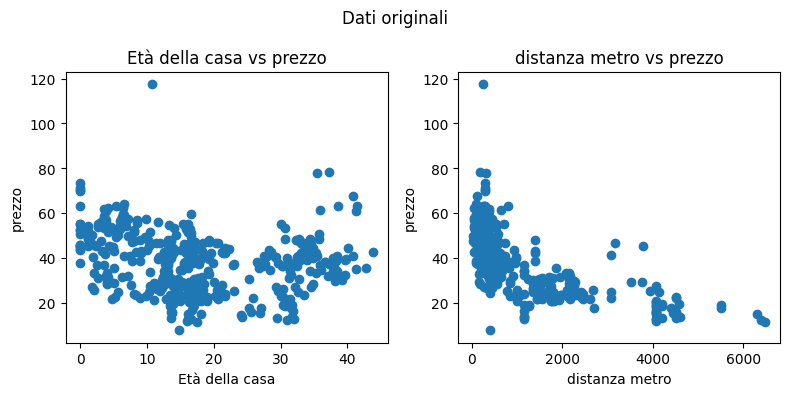

In [6]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati originali")

plt.subplot(1,2,1)
plt.scatter(X['X2 house age'],y)
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")

plt.subplot(1,2,2)
plt.scatter(X['X3 distance to the nearest MRT station'],y)
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")

plt.tight_layout()
plt.show()

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test)
y_pred

array([35.43140218, 10.90278969, 36.71884934, 45.84505214, 39.28426483,
       41.39566181, 43.29454045, 37.14099353, 43.98942926, 39.17923779,
       36.44053577, 34.53005995, 47.92191753, 25.63543106, 40.57884044,
       43.94093465, 27.71344408, 11.11157799, 39.32573063, 39.29719598,
       37.76043531, 36.99680184, 43.06465035, 45.54482479, 47.97041215,
        2.54455719, 40.94961785, 48.79822535, 37.16943589, 29.86453178,
       37.28093557, 26.24149307, 43.57125385, 32.44269261, 24.33441018,
       29.26688208, 42.5809156 , 48.02797138, 45.71545665, 47.89098919,
       45.98197614, 37.43560021, 34.83921431, 37.60344746, 34.50487573,
       48.66718981, 37.2900119 , 43.6917064 , 39.66853478, 40.5817107 ,
       40.69698893, 33.17517957, 43.64445577, 33.43515009, 43.25269692,
       39.68556091, 19.10204861, 42.72511799, 39.20513058, 41.18281155,
       46.31392226, 33.42212749, 38.39923898, 40.52716736, 16.7088623 ,
       48.66718981, 37.23244096, 47.80068099,  0.13618957, 17.22

In [10]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -0.24, Coefficiente b2: -0.01
Intercetta b0: 50.01


In [11]:
errore_quad = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

Errore quadratico medio: 64.72
R2: 0.59


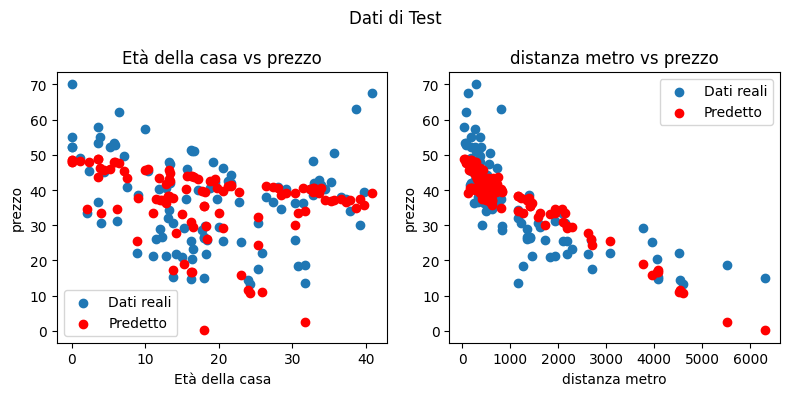

In [12]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di Test")

plt.subplot(1,2,1)
plt.scatter(X_test['X2 house age'],y_test, label="Dati reali")
plt.scatter(X_test['X2 house age'], y_pred, color='red', label='Predetto')
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()


plt.subplot(1,2,2)
plt.scatter(X_test['X3 distance to the nearest MRT station'],y_test, label="Dati reali")
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_pred, color='red', label='Predetto')
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()
plt.show()

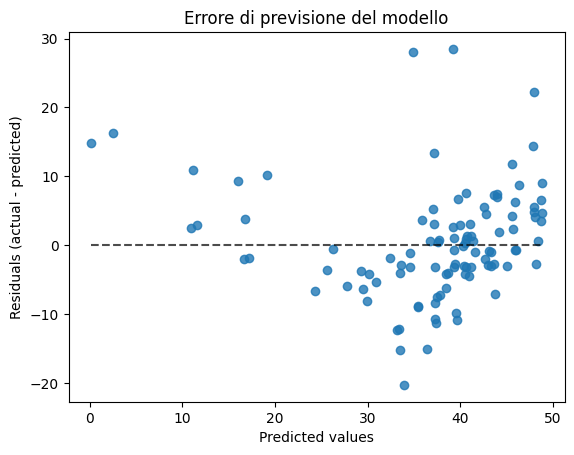

In [13]:
display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()
plt.title("Errore di previsione del modello")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_stand = X_scaler.fit_transform(X)


In [15]:
X_train_stand,X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand,y)

In [16]:
model.fit(X_train_stand, y_train_stand)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(f"Coefficiente b1: {model.coef_[0]:.2f}, Coefficiente b2: {model.coef_[1]:.2f}")
print(f"Intercetta b0: {model.intercept_:.2f}")

Coefficiente b1: -2.50, Coefficiente b2: -8.65
Intercetta b0: 37.50


In [18]:
y_pred_stand = model.predict(X_test_stand)
y_pred_stand

array([39.10160563, 39.21155277, 36.81467288, 17.15027971, 46.949315  ,
       46.97730603, 42.46156038, 12.12435164, 47.25926313, 44.05031643,
       33.81517949, 36.39491155, 47.54029762, 32.65877909, 37.82412421,
       40.36359149, 14.39197686, 47.63102203, 40.45574614, 46.91133774,
       32.22757058, 17.78797313, 44.0971975 , 46.8013906 , 11.41874191,
       44.182253  , 41.83847885, 17.06263155, 46.81906935, 37.4274017 ,
       12.38761099, 40.98656483, 42.32331128, 37.95673376, 37.00585722,
       36.85865174, 37.22272014, 46.81906935, 44.72150368, 39.02449935,
       42.3093737 , 37.30503418, 46.81906935, 42.58732858, 17.78797313,
       44.66393137, 39.77886676, 44.6457106 , 38.87570901, 27.78404624,
       38.9587779 , 47.25926313, 42.01286952, 17.04064212, 37.81228591,
       44.69299219, 34.35222949, 38.39683387, 27.39918744, 31.06975793,
       42.36745302, 43.30397196, 44.03393481, 34.17631407, 33.40123252,
       43.34795081, 36.26493717, 45.00618441, 47.69422362, 44.75

Errore quadratico medio: 148.24
R2: 0.44


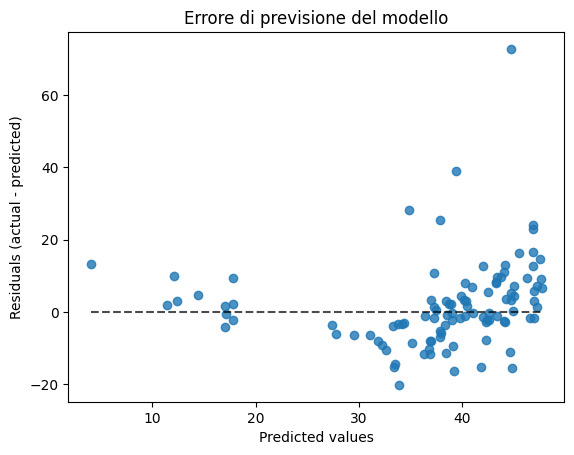

In [19]:
errore_quad = mean_squared_error(y_test_stand, y_pred_stand)
r2 = r2_score(y_test_stand, y_pred_stand)

print(f"Errore quadratico medio: {errore_quad:.2f}")
print(f"R2: {r2:.2f}")

display = PredictionErrorDisplay(y_true = y_test_stand, y_pred = y_pred_stand)
display.plot()
plt.title("Errore di previsione del modello")
plt.show()

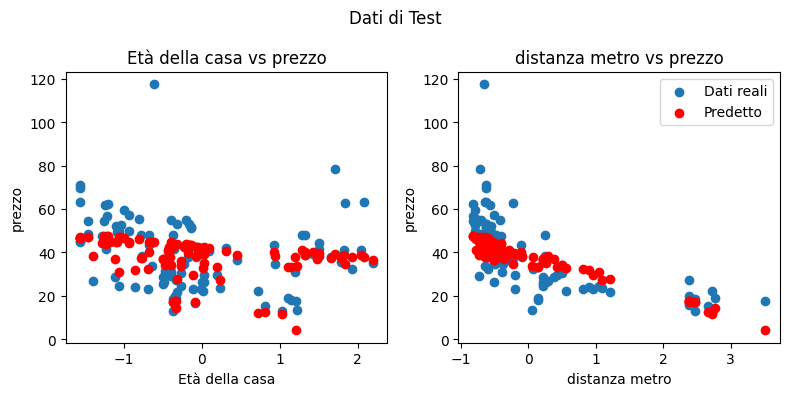

In [20]:
plt.figure(figsize = (8,4))
plt.suptitle("Dati di Test")

plt.subplot(1,2,1)
plt.scatter(X_test_stand[:,0],y_test_stand)
plt.scatter(X_test_stand[:,0], y_pred_stand, color='red', label='Predetto')
plt.title("Età della casa vs prezzo")
plt.xlabel("Età della casa")
plt.ylabel("prezzo")


plt.subplot(1,2,2)
plt.scatter(X_test_stand[:,1],y_test_stand, label="Dati reali")
plt.scatter(X_test_stand[:,1], y_pred_stand, color='red', label='Predetto')
plt.title("distanza metro vs prezzo")
plt.xlabel("distanza metro")
plt.ylabel("prezzo")
plt.legend()
plt.tight_layout()
plt.show()